In [5]:
import seaborn as sns
import numpy as np
import pandas as pd                 #Load all dependencies into the notebook
import xgboost as xgb
from xgboost import XGBClassifier

In [6]:
IMDB_data = 'Downloads/IMDB Top 250 Movies.csv'

movies_data = pd.read_csv(IMDB_data)          #Import the csv file from the dataset, and define the csv with the name "movies_data"

In [7]:
movies_data.head(10) #Displays the top 10 highest reated films in the dataset so we can train and test the information

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose
5,6,Schindler's List,1993,9.0,"Biography,Drama,History",R,3h 15m,"Whoever saves one life, saves the world entire.",22000000,322161245,"Liam Neeson,Ralph Fiennes,Ben Kingsley,Carolin...",Steven Spielberg,"Thomas Keneally,Steven Zaillian"
6,7,The Lord of the Rings: The Return of the King,2003,9.0,"Action,Adventure,Drama",PG-13,3h 21m,The eye of the enemy is moving.,94000000,1146457748,"Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens"
7,8,Pulp Fiction,1994,8.9,"Crime,Drama",R,2h 34m,Girls like me don't make invitations like this...,8000000,213928762,"John Travolta,Uma Thurman,Samuel L. Jackson,Br...",Quentin Tarantino,"Quentin Tarantino,Roger Avary"
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,"Action,Adventure,Drama",PG-13,2h 58m,The Legend Comes to Life,93000000,898204420,"Elijah Wood,Ian McKellen,Orlando Bloom,Sean Be...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens"
9,10,"The Good, the Bad and the Ugly",1966,8.8,"Adventure,Western",Approved,2h 58m,They formed an alliance of hate to steal a for...,1200000,25253887,"Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo ...",Sergio Leone,"Luciano Vincenzoni,Sergio Leone,Agenore Incrocci"


In [48]:
from sklearn.preprocessing import OrdinalEncoder     #Imported an ordinal encoder from sklearn which transforms or encodes categorical data in an array of integers

X, y = movies_data.drop("rating", axis=1), movies_data[['rating']]

# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()
dums = pd.get_dummies(X[cats])


X = X.drop(cats, axis = 1)      #Drops the columns in the category or "cats" within the datafram

X = pd.concat([X, dums], axis =1 )


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=None)  #Now we split the training and test data in order to proceed with our linear regression



In [49]:
X_train #Display the split training data

,rank,year,name_12 Angry Men,name_12 Years a Slave,name_1917,name_2001: A Space Odyssey,name_3 Idiots,name_A Beautiful Mind,name_A Clockwork Orange,name_A Separation,...,"writers_Todd Phillips,Scott Silver,Bob Kane",writers_Tom Schulman,"writers_Vincenzo Cerami,Roberto Benigni","writers_Will Davies,Dean DeBlois,Chris Sanders","writers_William Monahan,Alan Mak,Felix Chong",writers_William Peter Blatty,"writers_Winston Groom,Eric Roth","writers_Wolfgang Petersen,Lothar G. Buchheim","writers_Yasuhiko Takiguchi,Shinobu Hashimoto",writers_Çagan Irmak
228,229,1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,86,2010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,113,2009,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,149,2007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,172,1988,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,138,1998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,73,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,141,1999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,236,2000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.linear_model import LinearRegression     #import the linear regression component from sklearn
model = LinearRegression()
model.fit(X_train,y_train)                            # fit the model to the data that you are training, in this case the rating

LinearRegression()

In [51]:
print(model.intercept_)    #The model intercept of movie ratings which should show on the linear regression model

[9.10332497]


In [52]:
coeff_parameter = model.coef_  #Extracts the coefficient and assingns it to the "model.coef" variable


In [53]:
predictions = model.predict(X_test)    #Displays the model predictions so it can be used in comparison with our own
predictions

array([[8.43313584],
       [8.00475705],
       [7.9901933 ],
       [8.17351851],
       [8.44982253],
       [7.99595343],
       [8.45873883],
       [8.0426027 ],
       [8.15040669],
       [8.67373134],
       [8.02643938],
       [8.17372302],
       [8.34591528],
       [8.12814118],
       [8.28130876],
       [8.42820574],
       [8.1447894 ],
       [8.48634064],
       [8.56566539],
       [8.39746238],
       [8.00022605],
       [8.54861987],
       [8.4452707 ],
       [8.1537871 ],
       [8.32666718],
       [8.31225012],
       [7.93670147],
       [8.08326257],
       [8.49615253],
       [8.08748064],
       [8.02239503],
       [8.57979057],
       [8.45045143],
       [8.10264759],
       [8.17416348],
       [8.02767183],
       [8.59705427],
       [8.52906721],
       [8.60844888],
       [7.95075275],
       [8.00564398],
       [8.51755782],
       [8.40469884],
       [8.36918898],
       [8.50982132],
       [8.33187299],
       [8.51858796],
       [8.595

/Users/gmal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

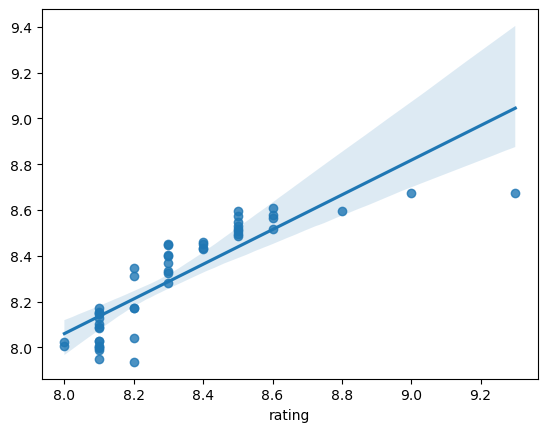

In [43]:
sns.regplot(y_test,predictions) #Displays the models linear regression

As you can see from the graph above, our linear regression model is not the best in tersm of accuracy 